In [ ]:
import pickle 
import glob
import os
import json
from collections import defaultdict
import collections
import pandas as pd
import numpy as np

In [2]:
PICKLE_DIR = "genomes_to_annotate_with_PlasmoFP/with_PFP_predictions_complete_2"
gene_dicts = {}
for pkl in glob.glob(f"{PICKLE_DIR}/*_gene_dict_with_PFP.pkl"):
    key = os.path.basename(pkl).split("_gene_dict")[0]
    with open(pkl, "rb") as f:
        gene_dicts[key] = pickle.load(f)

In [ ]:
mf_data = json.load(open('processed_data_90_30/trained_function_ALL_data_json_dict.json'))

def get_all_descendants(start_go_id, go_term_data):
    """
    Recursively retrieves all descendant GO IDs for a given starting GO ID.

    Args:
        start_go_id (str): The GO ID to find descendants for (e.g., 'GO:0003723').
        go_term_data (dict): The dictionary containing GO term information,
                             where keys are GO IDs and values are dicts with
                             a 'children' key (list of dicts, each with an 'id').

    Returns:
        set: A set of strings, where each string is a descendant GO ID.
             The starting GO ID itself is not included in this set.
    """
    all_descendant_ids = set()
    queue = collections.deque()

    if start_go_id in go_term_data and 'children' in go_term_data[start_go_id]:
        for child_info in go_term_data[start_go_id]['children']:
            child_id = child_info['id']
            if child_id not in all_descendant_ids: # Should always be true here initially
                all_descendant_ids.add(child_id)
                queue.append(child_id)

    while queue:
        current_go_id = queue.popleft()

        if current_go_id in go_term_data and 'children' in go_term_data[current_go_id]:
            for child_info in go_term_data[current_go_id]['children']:
                grandchild_id = child_info['id']
                if grandchild_id not in all_descendant_ids:
                    all_descendant_ids.add(grandchild_id)
                    queue.append(grandchild_id)
    
    return all_descendant_ids

start_term = 'GO:0003723'

RNA_binding_descendants = get_all_descendants(start_term, mf_data) 

print(f"Starting GO Term: {start_term}")
print(f"Length of Descendants: {len(RNA_binding_descendants)}")
RNA_binding_descendants.add(start_term)
print(f"Length of Descendants + Start Term: {len(RNA_binding_descendants)}")


Starting GO Term: GO:0003723
Length of Descendants: 92
Length of Descendants + Start Term: 93


(GO:0016071: mRNA metabolic process;,; GO:0006396: RNA processing;  GO:0005840: Ribosome).



GO:0140098 catalytic activity acting on RNA
GO:0003723: RNA binding;

In [ ]:
start_term = "GO:0140098"
catalytic_activity_acting_on_rna_descendants = get_all_descendants(start_term, mf_data)
print(f"Starting GO Term: {start_term}")
print(f"Length of Descendants: {len(catalytic_activity_acting_on_rna_descendants)}")
catalytic_activity_acting_on_rna_descendants.add(start_term)
print(f"Length of Descendants + Start Term: {len(catalytic_activity_acting_on_rna_descendants)}")

Starting GO Term: GO:0140098
Length of Descendants: 258
Length of Descendants + Start Term: 259


In [ ]:
bp_data = json.load(open('processed_data_90_30/trained_process_ALL_data_json_dict.json'))
start_term = "GO:0016071"
mrna_metabolic_process_descendants = get_all_descendants(start_term, bp_data)
print(f"Starting GO Term: {start_term}")
print(f"Length of Descendants: {len(mrna_metabolic_process_descendants)}")
mrna_metabolic_process_descendants.add(start_term)
print(f"Length of Descendants + Start Term: {len(mrna_metabolic_process_descendants)}")


start_term = "GO:0006396"
rna_processing_descendants = get_all_descendants(start_term, bp_data)
rna_processing_descendants.add(start_term)
print(f"Starting GO Term: {start_term}")
print(f"Length of Descendants + Start Term: {len(rna_processing_descendants)}")

cc_data = json.load(open('processed_data_90_30/trained_component_ALL_data_json_dict.json'))
start_term = "GO:0005840"
ribosome_descendants = get_all_descendants(start_term, cc_data)
ribosome_descendants.add(start_term)
print("Length of Ribosome Descendants: ", len(ribosome_descendants))

Starting GO Term: GO:0016071
Length of Descendants: 99
Length of Descendants + Start Term: 100
Starting GO Term: GO:0006396
Length of Descendants + Start Term: 209
Length of Ribosome Descendants:  17


In [7]:
RNA_associated_desendants = RNA_binding_descendants.union(catalytic_activity_acting_on_rna_descendants).union(mrna_metabolic_process_descendants).union(rna_processing_descendants).union(ribosome_descendants)
print("Length of RNA Associated Descendants: ", len(RNA_associated_desendants))

Length of RNA Associated Descendants:  636


In [ ]:
dna_binding_descendants = get_all_descendants('GO:0003677', mf_data)
dna_binding_descendants.add('GO:0003677')

transcription_regulator_descendants = get_all_descendants('GO:0003700', mf_data)
transcription_regulator_descendants.add('GO:0003700')

dna_metabolic_descendants = get_all_descendants('GO:0006259', bp_data)
dna_metabolic_descendants.add('GO:0006259')

dna_replication_descendants = get_all_descendants('GO:0006260', bp_data)
dna_replication_descendants.add('GO:0006260')

dna_repair_descendants = get_all_descendants('GO:0006281', bp_data)
dna_repair_descendants.add('GO:0006281')

dna_recombination_descendants = get_all_descendants('GO:0006310', bp_data)
dna_recombination_descendants.add('GO:0006310')

DNA_associated_descendants = (
    dna_binding_descendants
    .union(transcription_regulator_descendants)
    .union(dna_metabolic_descendants)
    .union(dna_replication_descendants)
    .union(dna_repair_descendants)
    .union(dna_recombination_descendants)
)

print("DNA binding + descendants:", len(dna_binding_descendants))
print("Transcription regulator + descendants:", len(transcription_regulator_descendants))
print("DNA metabolic + descendants:", len(dna_metabolic_descendants))
print("DNA replication + descendants:", len(dna_replication_descendants))
print("DNA repair + descendants:", len(dna_repair_descendants))
print("DNA recombination + descendants:", len(dna_recombination_descendants))
print("Total DNA‐associated GO terms:", len(DNA_associated_descendants))


DNA binding + descendants: 111
Transcription regulator + descendants: 14
DNA metabolic + descendants: 268
DNA replication + descendants: 86
DNA repair + descendants: 60
DNA recombination + descendants: 54
Total DNA‐associated GO terms: 393


In [ ]:
import collections

def count_proteins_by_go_annotations(gene_ontology_data, relevant_go_ids,PFP_predictions=False):
    """
    Counts proteins per species associated with a given set of GO terms
    by checking Function, Process, and Component annotations including IEA and PFP categories.

        gene_ontology_data (dict): The main gene_dicts structure.
                                   Example: {'SpeciesX': {'ProteinY': {'GO Function': [...], ...}}}
        relevant_go_ids (set): A set of GO IDs to search for (e.g., a GO term and its descendants).
    """
    species_protein_counts = collections.defaultdict(int)

    if not relevant_go_ids:
        return species_protein_counts

    annotation_groups = [
        ('GO Function', 'GO IEA Function', 'PFP MF'),
        ('GO Process', 'GO IEA Process', 'PFP BP'),
        ('GO Component', 'GO IEA Component', 'PFP CC'),
    ]

    for species_id, proteins_in_species in gene_ontology_data.items():
        protein_found_in_species_count = 0
        for protein_id, annotations in proteins_in_species.items():
            protein_is_associated = False

            for direct_key, iea_key, pfp_key in annotation_groups:
                direct_terms = annotations.get(direct_key)
                if direct_terms:
                    for go_id in direct_terms:
                        if go_id in relevant_go_ids:
                            protein_is_associated = True
                            break
                if protein_is_associated:
                    break

                iea_terms = annotations.get(iea_key)
                if iea_terms:
                    for go_id in iea_terms:
                        if go_id in relevant_go_ids:
                            protein_is_associated = True
                            break
                if protein_is_associated:
                    break

                if PFP_predictions:
                    #PFP annotations (dict of FDR -> set of tuples)
                    pfp_data = annotations.get(pfp_key)
                    if pfp_data:
                        for fdr_key, go_tuples in pfp_data.items():
                            for go_tuple in go_tuples:
                                # go_tuple is like ('GO:ID', score, 'description')
                                pfp_go_id = go_tuple[0]
                                if pfp_go_id in relevant_go_ids:
                                    protein_is_associated = True
                                    break
                            if protein_is_associated:
                                break
                    if protein_is_associated:
                        break

            if protein_is_associated:
                protein_found_in_species_count += 1

        species_protein_counts[species_id] = protein_found_in_species_count

    return species_protein_counts


In [ ]:
species_to_name = {'PlasmoDB-68_PadleriG01': 'P. adleri',
             'PlasmoDB-68_PbergheiANKA': 'P. berghei',
             'PlasmoDB-68_PblacklockiG01': 'P. blacklocki',
             'PlasmoDB-68_Pchabaudichabaudi': 'P. chabaudi',
             'PlasmoDB-68_PcoatneyiHackeri': 'P. coatneyi',
             'PlasmoDB-68_PcynomolgiM': 'P. cynomolgi',
             'PlasmoDB-68_Pfalciparum3D7': 'P. falciparum',
             'PlasmoDB-68_PfragileNilgiri': 'P. fragile',
             'PlasmoDB-68_PgaboniG01': 'P. gaboni',
             'PlasmoDB-68_Pgallinaceum8A': 'P. gallinaceum',
             'PlasmoDB-68_PinuiSanAntonio1': 'P. inui',
             'PlasmoDB-68_PknowlesiH': 'P. knowlesi',
             'PlasmoDB-68_PmalariaeUG01': 'P. malariae',
             'PlasmoDB-68_PovalecurtisiGH01': 'P. ovale curtisi',
             'PlasmoDB-68_PovalewallikeriPowCR01': 'P. ovale wallikeri',
             'PlasmoDB-68_PreichenowiCDC': 'P. reichenowi',
             'PlasmoDB-68_PvinckeibrucechwattiDA': 'P. vinckei',
             'PlasmoDB-68_PvivaxSal1': 'P. vivax',
             'PlasmoDB-68_Pyoeliiyoelii17XNL2023': 'P. yoelii'}

In [46]:
RNA_associated_counts = count_proteins_by_go_annotations(gene_dicts, RNA_associated_desendants, True)
DNA_associated_counts = count_proteins_by_go_annotations(gene_dicts, DNA_associated_descendants, True)
RNA_associated_counts_withoutPFP = count_proteins_by_go_annotations(gene_dicts, RNA_associated_desendants)
DNA_associated_counts_withoutPFP = count_proteins_by_go_annotations(gene_dicts, DNA_associated_descendants)

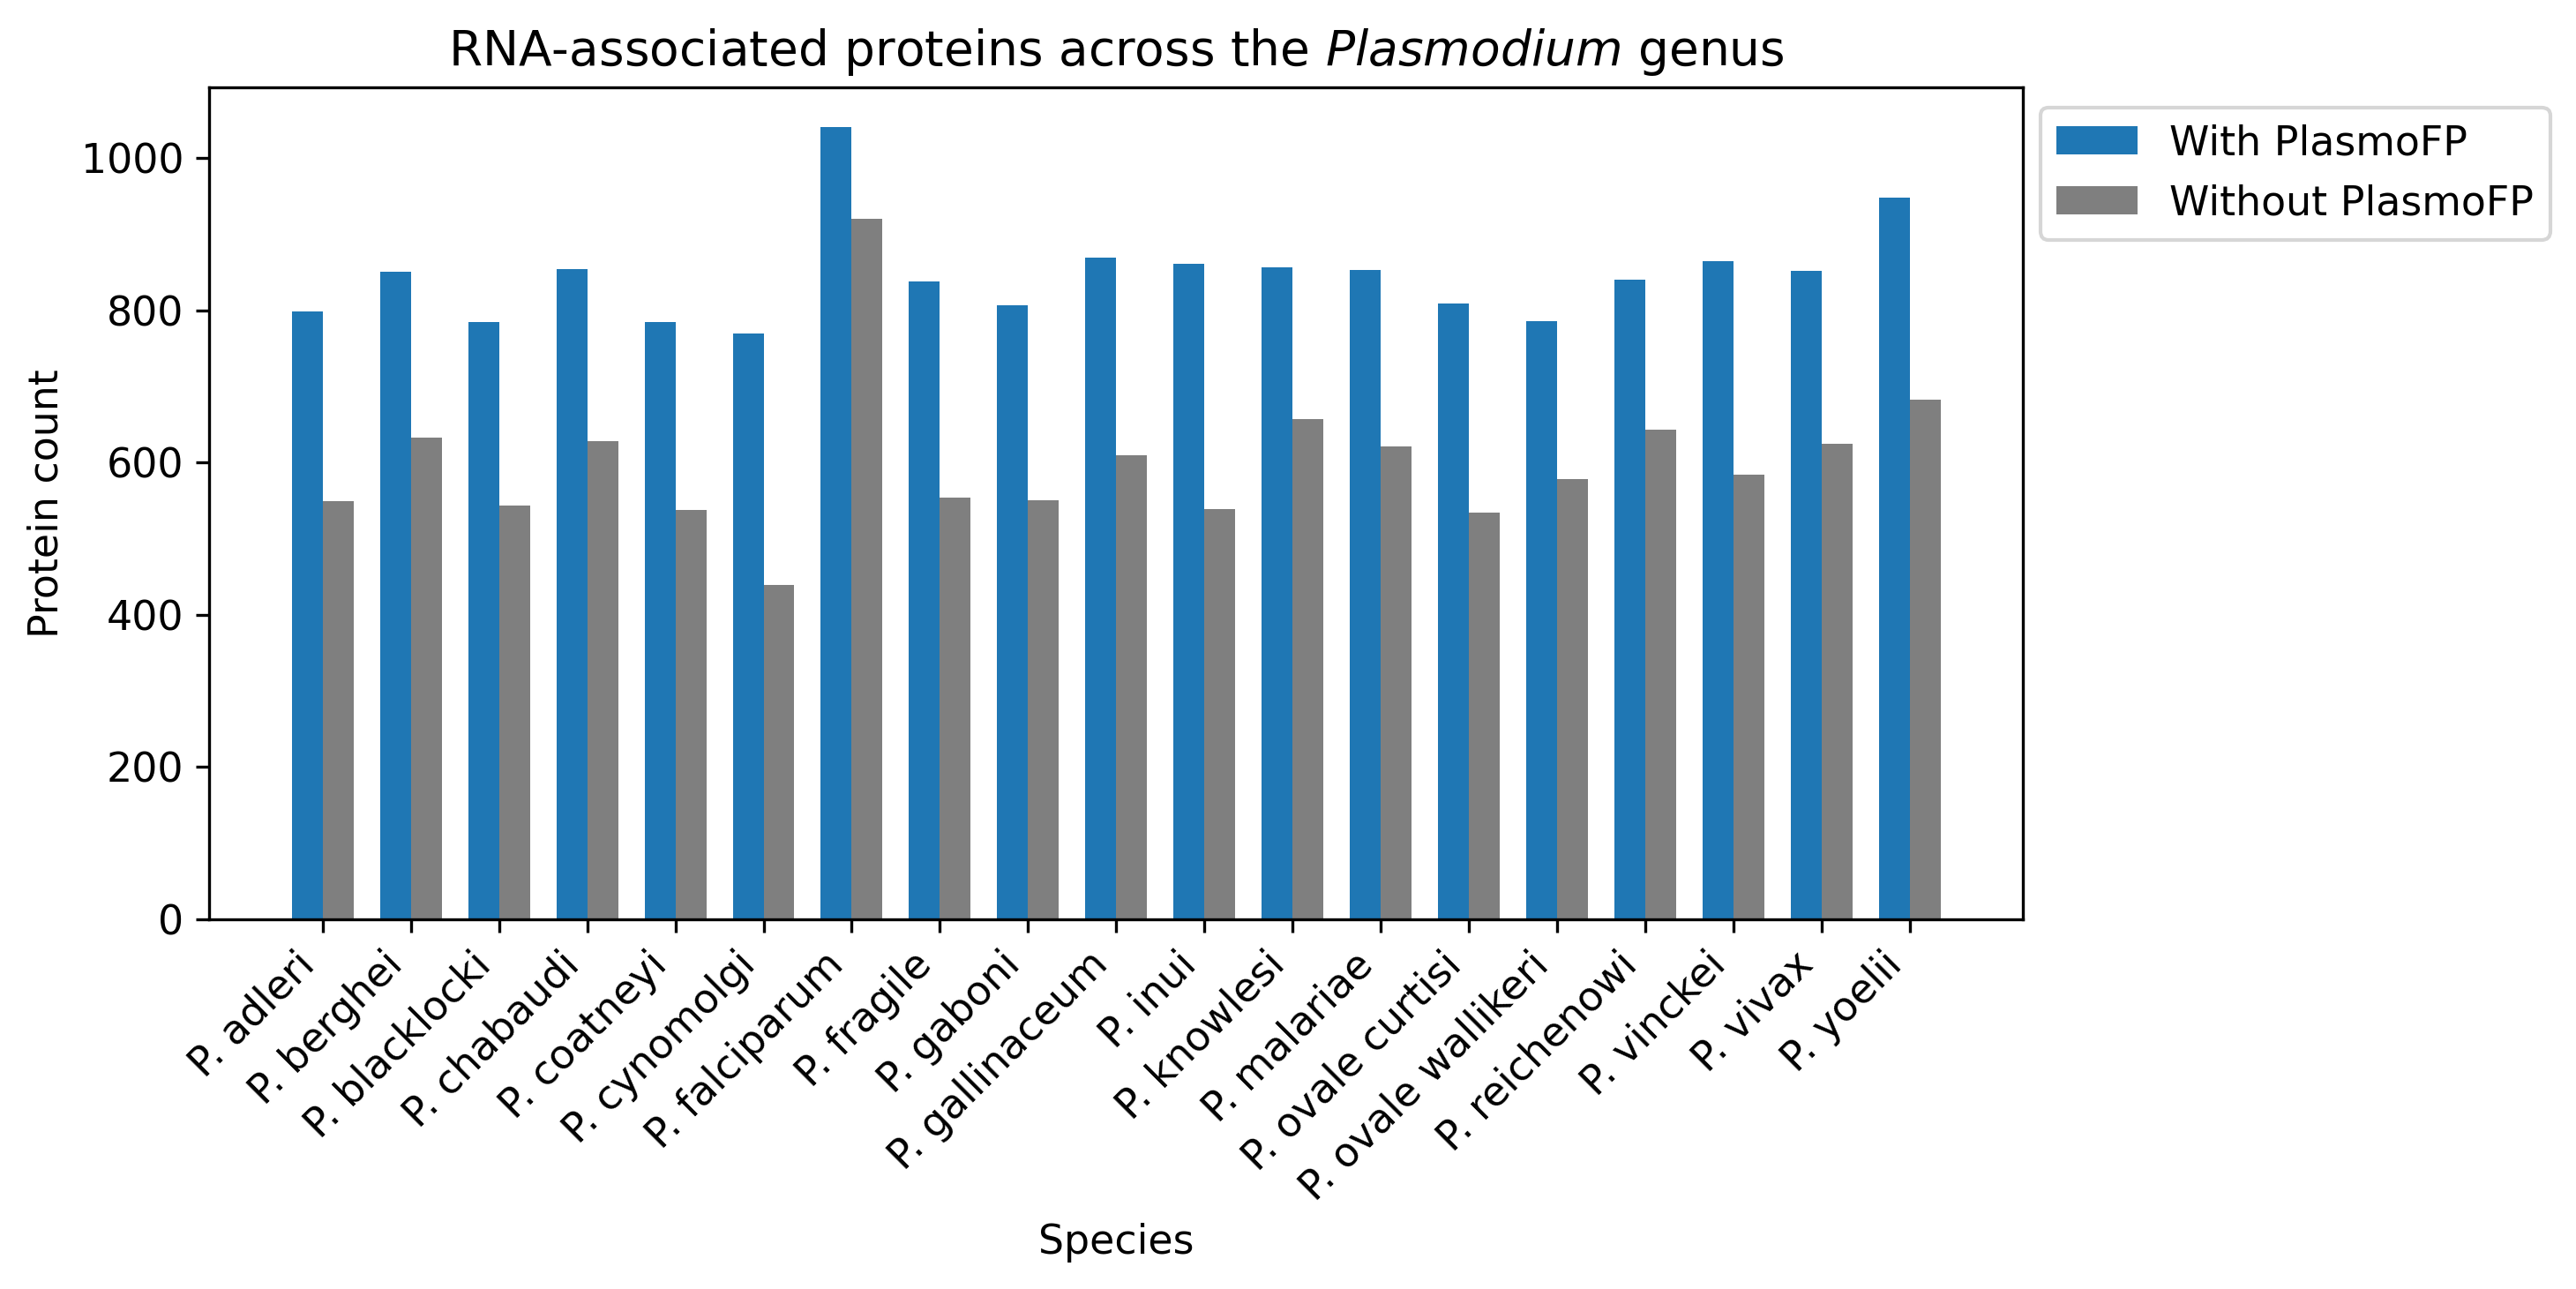

In [47]:
species = list(RNA_associated_counts.keys())
labels  = [species_to_name.get(s, s) for s in species]

data = [
    (species[i],
     labels[i],
     RNA_associated_counts[species[i]],
     RNA_associated_counts_withoutPFP[species[i]])
    for i in range(len(species))
]

data_sorted = sorted(data, key=lambda x: x[1])

species_sorted, labels_sorted, counts_with, counts_without = zip(*data_sorted)

x     = np.arange(len(species_sorted))
width = 0.35

plt.figure(figsize=(10, 5), dpi=300)
plt.bar(x - width/2, counts_with,    width, label='With PlasmoFP',    color='tab:blue')
plt.bar(x + width/2, counts_without, width, label='Without PlasmoFP', color='tab:grey')

plt.xlabel('Species')
plt.ylabel('Protein count')
plt.title(r"RNA-associated proteins across the $\mathit{Plasmodium}$ genus")
plt.xticks(x, labels_sorted, rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1)
plt.tight_layout()
plt.show()


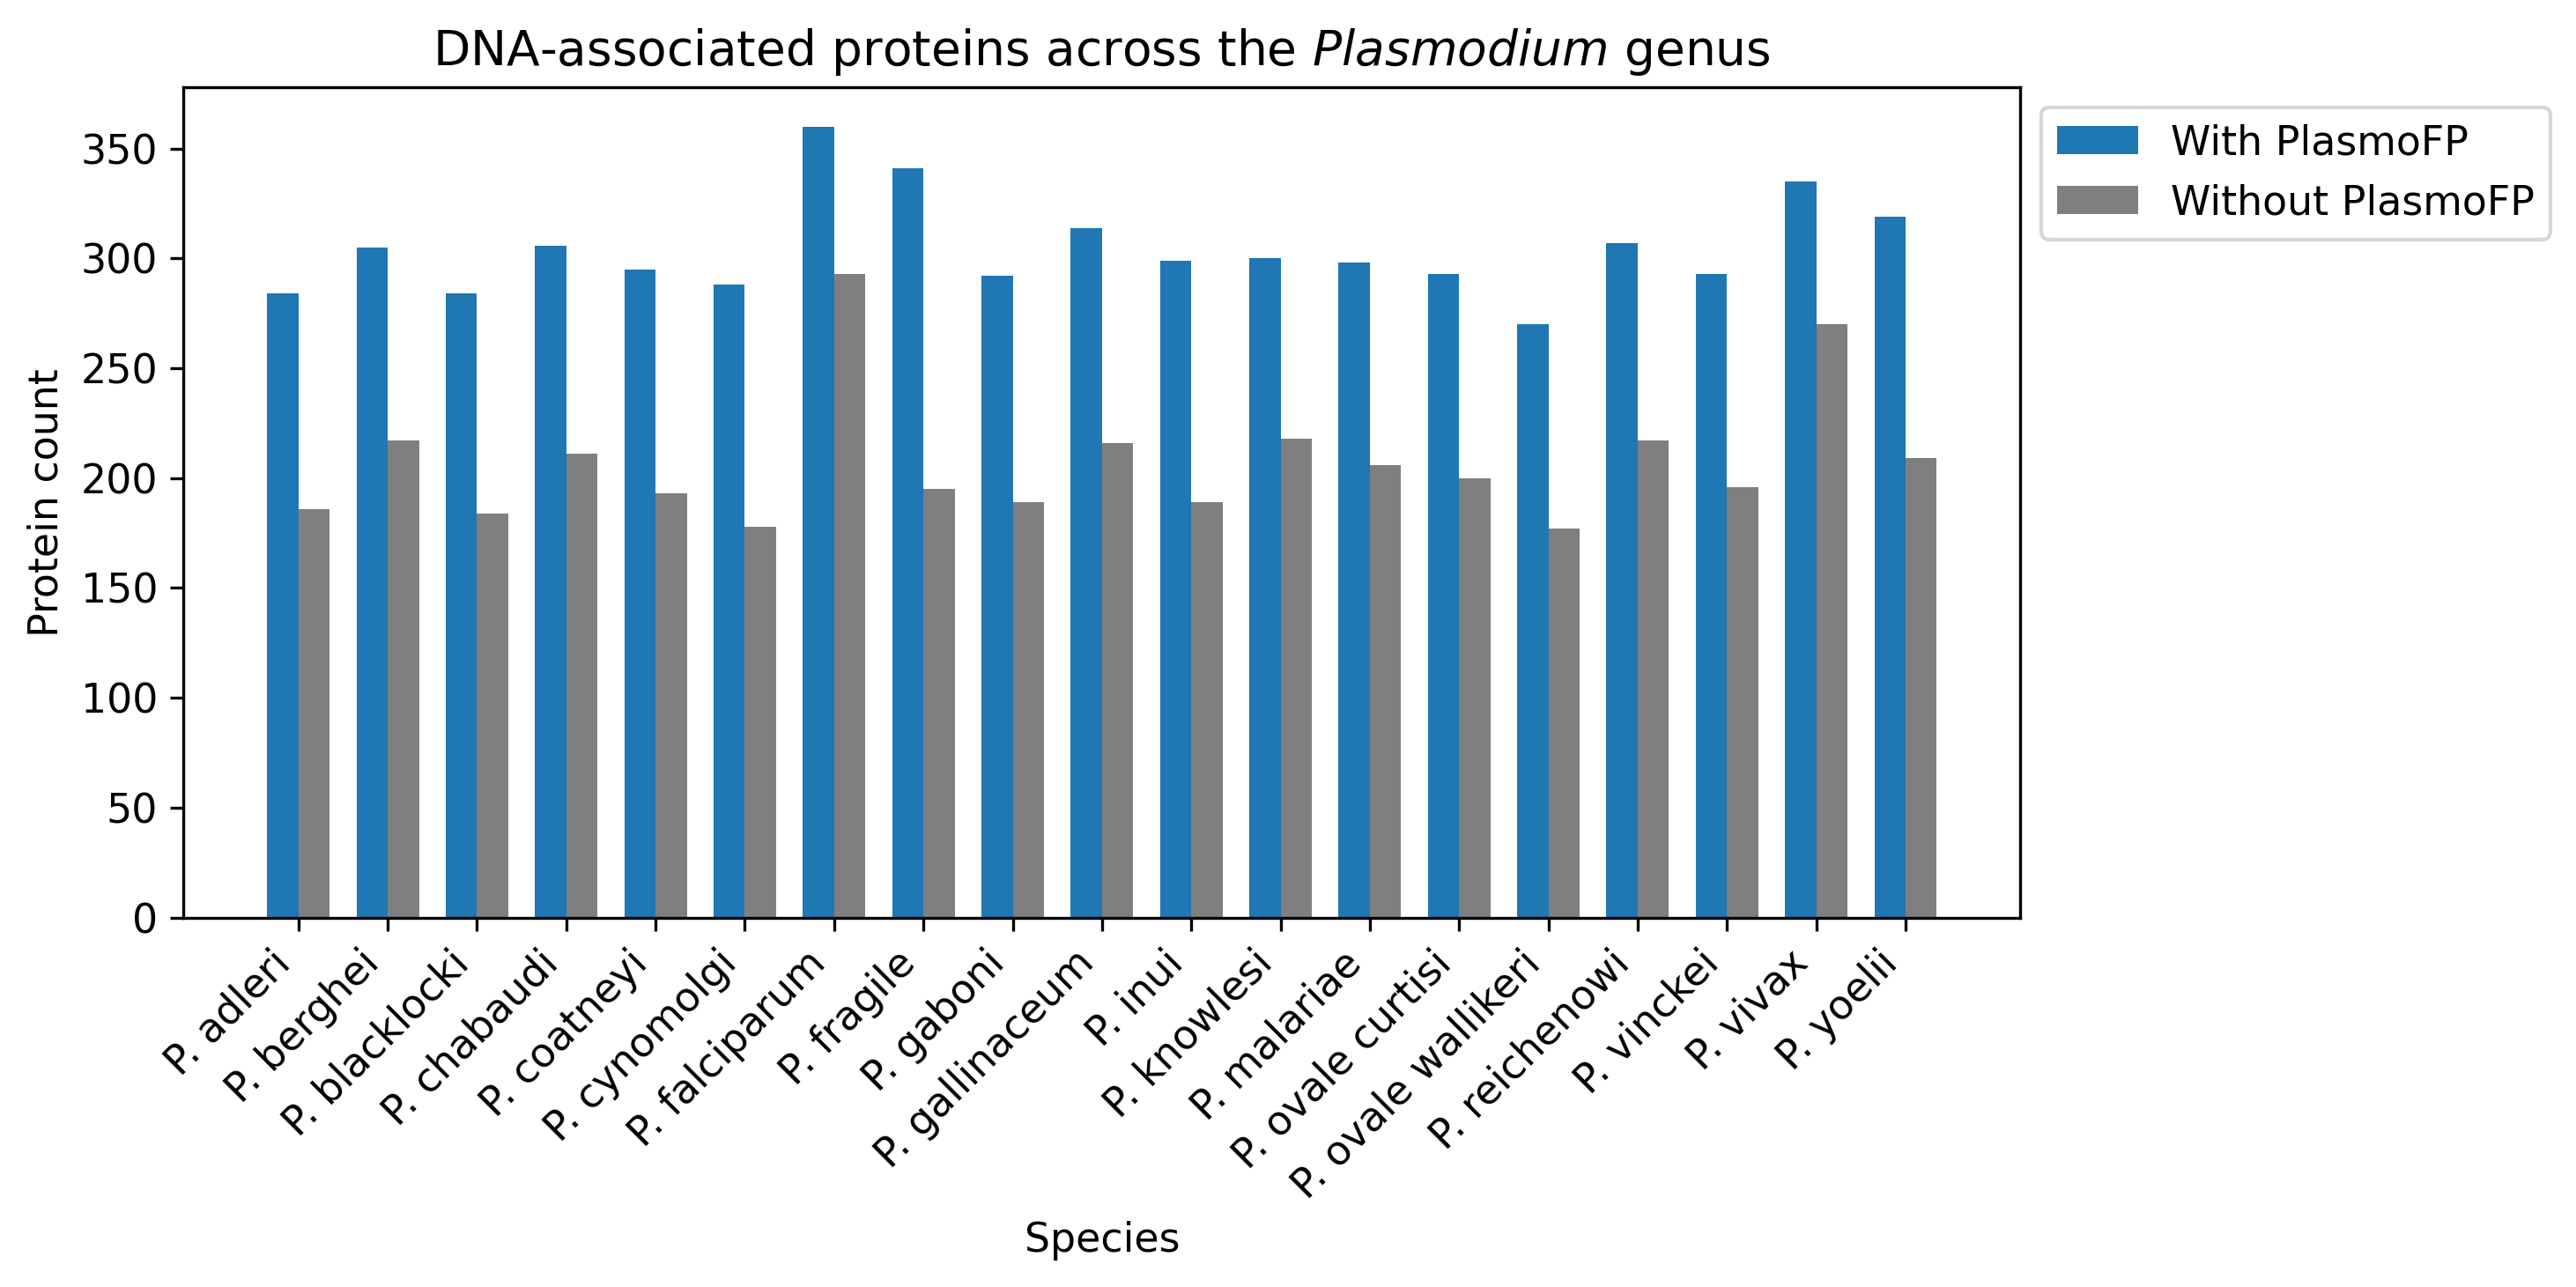

In [48]:
data = [
    (species[i],
     labels[i],
     DNA_associated_counts[species[i]],
     DNA_associated_counts_withoutPFP[species[i]])
    for i in range(len(species))
]

data_sorted = sorted(data, key=lambda x: x[1])

species_sorted, labels_sorted, counts_with, counts_without = zip(*data_sorted)

x     = np.arange(len(species_sorted))
width = 0.35

plt.figure(figsize=(10, 5), dpi=300)
plt.bar(x - width/2, counts_with,    width, label='With PlasmoFP',    color='tab:blue')
plt.bar(x + width/2, counts_without, width, label='Without PlasmoFP', color='tab:grey')

plt.xlabel('Species')
plt.ylabel('Protein count')
plt.title(r"DNA-associated proteins across the $\mathit{Plasmodium}$ genus")
plt.xticks(x, labels_sorted, rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1)
plt.tight_layout()
plt.grid(False)
plt.show()


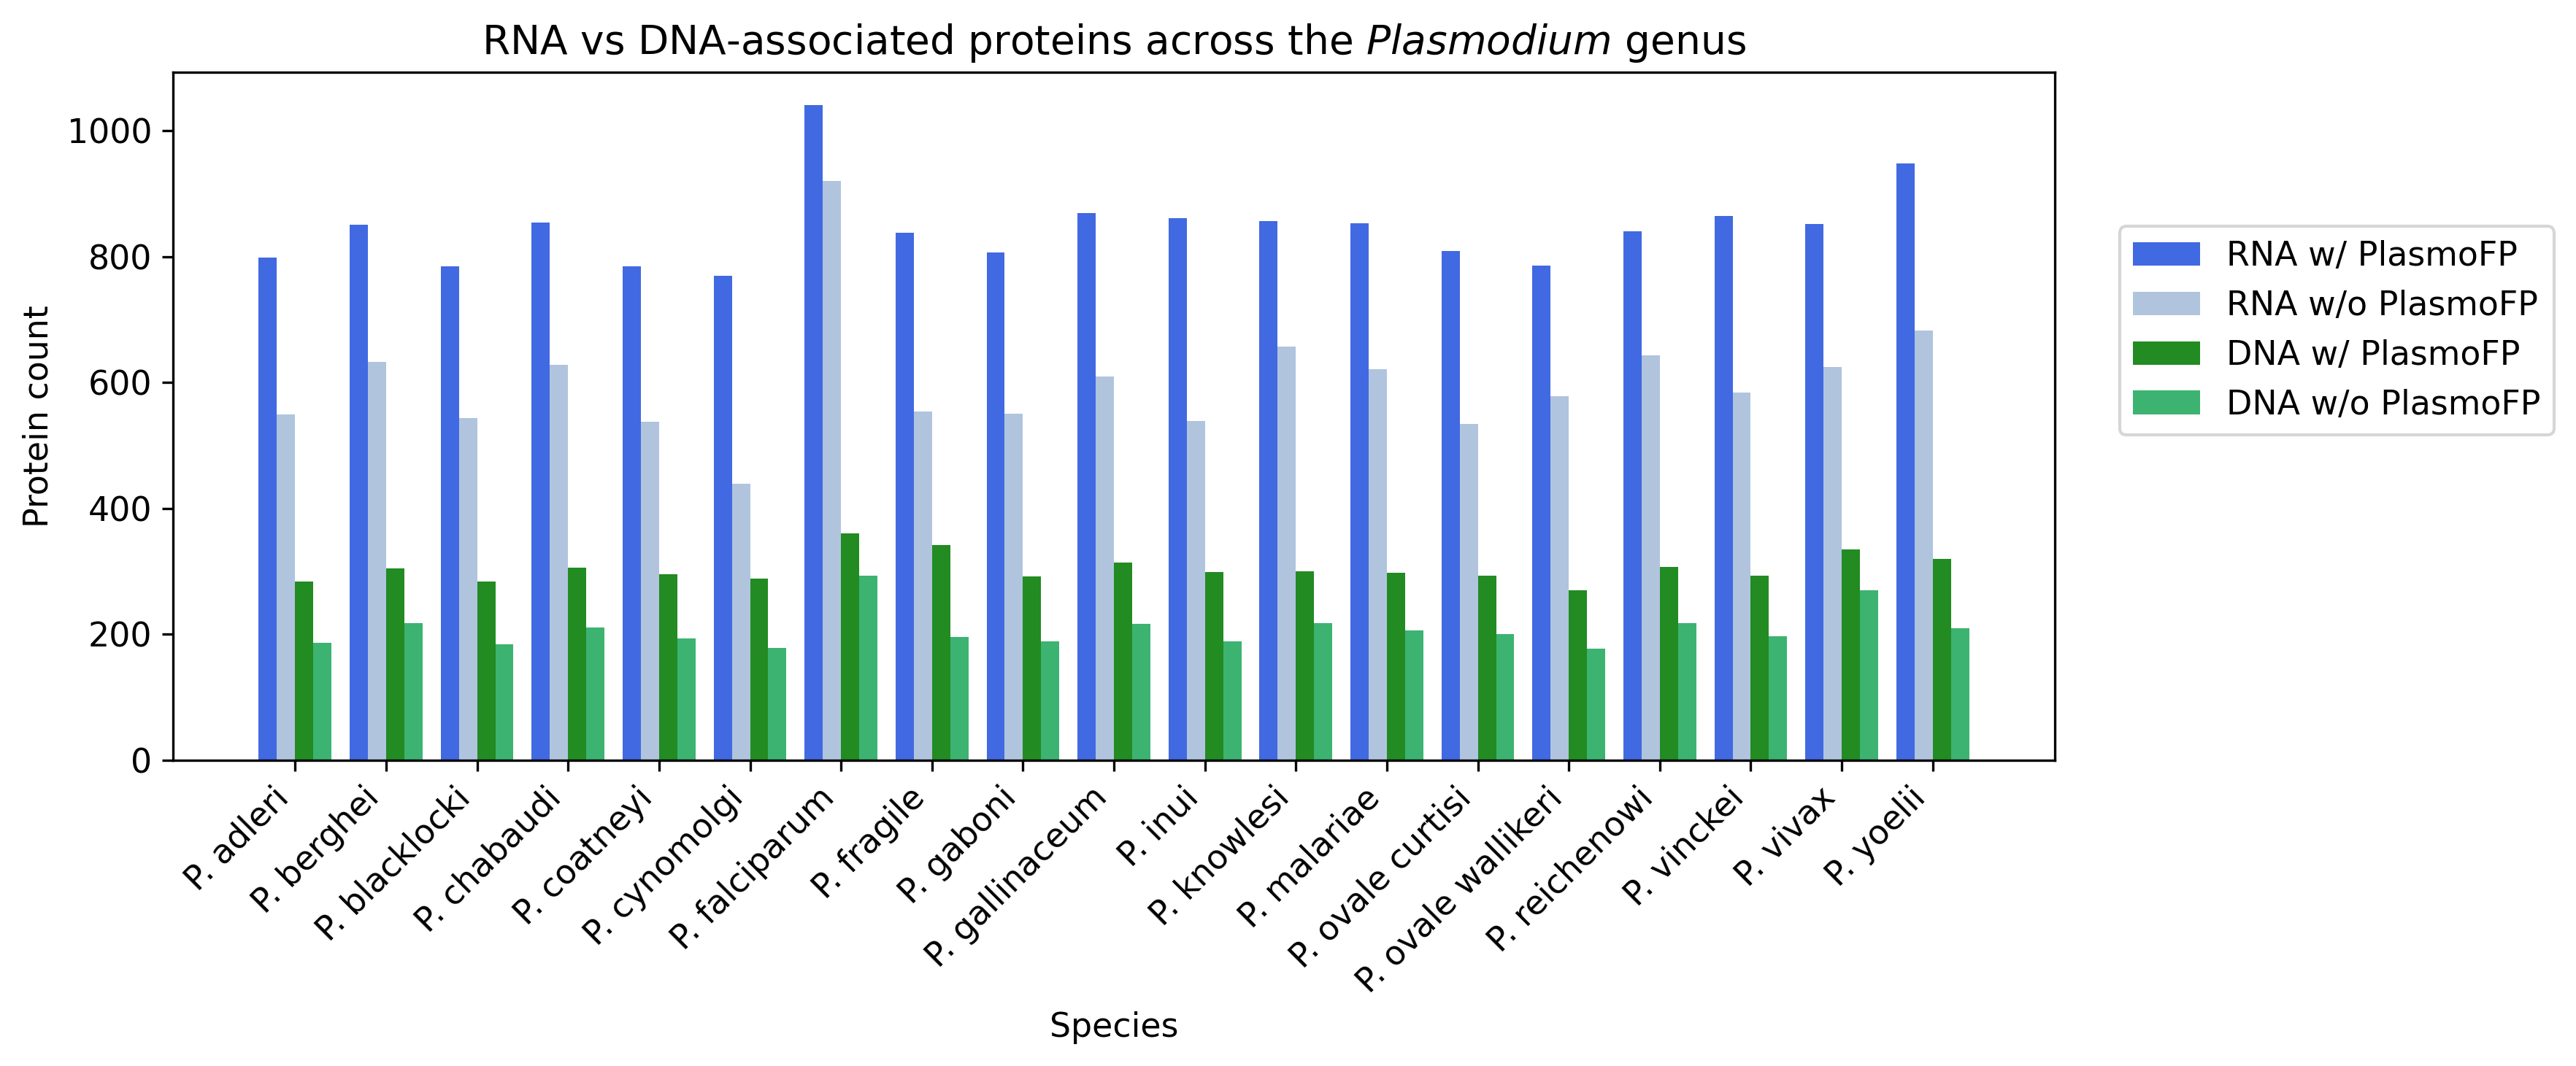

In [51]:
species = list(RNA_associated_counts.keys())
labels  = [species_to_name.get(s, s) for s in species]

rna_with    = [ RNA_associated_counts[s]                 for s in species ]
rna_without = [ RNA_associated_counts_withoutPFP[s]      for s in species ]
dna_with    = [ DNA_associated_counts[s]                 for s in species ]
dna_without = [ DNA_associated_counts_withoutPFP[s]      for s in species ]



data = list(zip(species, labels, rna_with, rna_without, dna_with, dna_without))
data_sorted = sorted(data, key=lambda x: x[1])
_, labels_sorted, rna_with, rna_without, dna_with, dna_without = zip(*data_sorted)

rna_with    = [count for label, count in zip(labels_sorted, rna_with) if label != 'P. vivax P01']
rna_without = [count for label, count in zip(labels_sorted, rna_without) if label != 'P. vivax P01']
dna_with    = [count for label, count in zip(labels_sorted, dna_with) if label != 'P. vivax P01']
dna_without = [count for label, count in zip(labels_sorted, dna_without) if label != 'P. vivax P01']

N     = len(labels_sorted)
x     = np.arange(N)
width = 0.2

plt.figure(figsize=(12,5), dpi=300)

plt.bar(x - 1.5*width, rna_with,    width, label='RNA w/ PlasmoFP', color='royalblue')
plt.bar(x - 0.5*width, rna_without, width, label='RNA w/o PlasmoFP', color='lightsteelblue')
plt.bar(x + 0.5*width, dna_with,    width, label='DNA w/ PlasmoFP', color='forestgreen')
plt.bar(x + 1.5*width, dna_without, width, label='DNA w/o PlasmoFP', color='mediumseagreen')

plt.xlabel('Species')
plt.ylabel('Protein count')
plt.title(r"RNA vs DNA-associated proteins across the $\mathit{Plasmodium}$ genus")
plt.xticks(x, labels_sorted, rotation=45, ha='right')
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), ncol=1)
plt.tight_layout()

plt.grid(False)
plt.show()


In [ ]:
def get_total_annotated_proteins_per_species(gene_ontology_data, PFP_predictions=False):
    """
    Counts, for each species, the total number of unique proteins that have at least
    one GO annotation in any of the Function, Process, or Component ontologies.
    """
    species_total_annotated_counts = collections.defaultdict(int)

    # direct & IEA always; PFP only if requested
    annotation_groups = [
        ('GO Function',     'GO IEA Function',     'PFP MF'),
        ('GO Process',      'GO IEA Process',      'PFP BP'),
        ('GO Component',    'GO IEA Component',    'PFP CC'),
    ]

    for species_id, proteins in gene_ontology_data.items():
        total = 0
        for prot_id, ann in proteins.items():
            has_annotation = False

            for direct_key, iea_key, pfp_key in annotation_groups:
                if ann.get(direct_key):
                    has_annotation = True

                elif ann.get(iea_key):
                    has_annotation = True

                elif PFP_predictions:
                    pfp_dict = ann.get(pfp_key, {})
                    if any(len(go_ts) > 0 for go_ts in pfp_dict.values()):
                        has_annotation = True

                if has_annotation:
                    total += 1
                    break

        species_total_annotated_counts[species_id] = total

    return species_total_annotated_counts

In [20]:
RNA_associated_descendants = set(RNA_associated_desendants)

In [ ]:
RNA_associated_counts_withoutPFP = count_proteins_by_go_annotations(
    gene_dicts,
    RNA_associated_descendants,
    PFP_predictions=False
)

total_annotated_counts_withoutPFP = get_total_annotated_proteins_per_species(
    gene_dicts,
    PFP_predictions=False
)

normalized_rna_presence_withoutPFP = {}
all_species = set(RNA_associated_counts_withoutPFP) | set(total_annotated_counts_withoutPFP)

for sp in all_species:
    num_rna   = RNA_associated_counts_withoutPFP.get(sp, 0)
    num_total = total_annotated_counts_withoutPFP.get(sp, 0)
    normalized_rna_presence_withoutPFP[sp] = (num_rna / num_total) if num_total > 0 else 0.0

print("Normalized RNA‐associated protein presence per species (no PFP):")
for sp, score in normalized_rna_presence_withoutPFP.items():
    print(f"{sp}: {score:.4f}")

Normalized RNA‐associated protein presence per species (no PFP):
PlasmoDB-68_Pfalciparum3D7: 0.2025
PlasmoDB-68_Pgallinaceum8A: 0.1612
PlasmoDB-68_PreichenowiCDC: 0.1488
PlasmoDB-68_PcoatneyiHackeri: 0.1563
PlasmoDB-68_PvinckeibrucechwattiDA: 0.1759
PlasmoDB-68_PbergheiANKA: 0.1716
PlasmoDB-68_PinuiSanAntonio1: 0.1634
PlasmoDB-68_PcynomolgiM: 0.1801
PlasmoDB-68_PmalariaeUG01: 0.1401
PlasmoDB-68_PblacklockiG01: 0.1548
PlasmoDB-68_PgaboniG01: 0.1614
PlasmoDB-68_PovalecurtisiGH01: 0.1606
PlasmoDB-68_PovalewallikeriPowCR01: 0.1457
PlasmoDB-68_PknowlesiH: 0.1760
PlasmoDB-68_PvivaxSal1: 0.1678
PlasmoDB-68_Pyoeliiyoelii17XNL2023: 0.2040
PlasmoDB-68_PadleriG01: 0.1517
PlasmoDB-68_Pchabaudichabaudi: 0.1687
PlasmoDB-68_PfragileNilgiri: 0.1604


In [ ]:
RNA_associated_counts_withPFP = count_proteins_by_go_annotations(
    gene_dicts,
    RNA_associated_descendants,
    PFP_predictions=True
)

total_annotated_counts_withPFP = get_total_annotated_proteins_per_species(
    gene_dicts,
    PFP_predictions=True
)

normalized_rna_presence_withPFP = {}
all_species = set(RNA_associated_counts_withPFP) | set(total_annotated_counts_withPFP)

for sp in all_species:
    num_rna   = RNA_associated_counts_withPFP.get(sp, 0)
    num_total = total_annotated_counts_withPFP.get(sp, 0)
    normalized_rna_presence_withPFP[sp] = (num_rna / num_total) if num_total > 0 else 0.0

print("Normalized RNA-associated protein presence per species (with PFP):")
for sp, score in normalized_rna_presence_withPFP.items():
    print(f"{sp}: {score:.4f}")


Normalized RNA-associated protein presence per species (with PFP):
PlasmoDB-68_Pfalciparum3D7: 0.1995
PlasmoDB-68_Pgallinaceum8A: 0.1768
PlasmoDB-68_PreichenowiCDC: 0.1580
PlasmoDB-68_PcoatneyiHackeri: 0.1514
PlasmoDB-68_PvinckeibrucechwattiDA: 0.1821
PlasmoDB-68_PbergheiANKA: 0.1805
PlasmoDB-68_PinuiSanAntonio1: 0.1553
PlasmoDB-68_PcynomolgiM: 0.1643
PlasmoDB-68_PmalariaeUG01: 0.1518
PlasmoDB-68_PblacklockiG01: 0.1628
PlasmoDB-68_PgaboniG01: 0.1678
PlasmoDB-68_PovalecurtisiGH01: 0.1604
PlasmoDB-68_PovalewallikeriPowCR01: 0.1425
PlasmoDB-68_PknowlesiH: 0.1774
PlasmoDB-68_PvivaxSal1: 0.1678
PlasmoDB-68_Pyoeliiyoelii17XNL2023: 0.1875
PlasmoDB-68_PadleriG01: 0.1598
PlasmoDB-68_Pchabaudichabaudi: 0.1771
PlasmoDB-68_PfragileNilgiri: 0.1561


In [ ]:
DNA_associated_counts_withoutPFP = count_proteins_by_go_annotations(
    gene_dicts,
    DNA_associated_descendants,
    PFP_predictions=False
)

total_annotated_counts_withoutPFP = get_total_annotated_proteins_per_species(
    gene_dicts,
    PFP_predictions=False
)

normalized_dna_presence_withoutPFP = {}
all_species = set(DNA_associated_counts_withoutPFP) | set(total_annotated_counts_withoutPFP)

for sp in all_species:
    num_dna   = DNA_associated_counts_withoutPFP.get(sp, 0)
    num_total = total_annotated_counts_withoutPFP.get(sp, 0)
    normalized_dna_presence_withoutPFP[sp] = (num_dna / num_total) if num_total > 0 else 0.0

print("Normalized DNA‐associated protein presence per species (no PFP):")
for sp, score in normalized_dna_presence_withoutPFP.items():
    print(f"{sp}: {score:.4f}")


Normalized DNA‐associated protein presence per species (no PFP):
PlasmoDB-68_Pfalciparum3D7: 0.0645
PlasmoDB-68_Pgallinaceum8A: 0.0572
PlasmoDB-68_PreichenowiCDC: 0.0502
PlasmoDB-68_PcoatneyiHackeri: 0.0562
PlasmoDB-68_PvinckeibrucechwattiDA: 0.0590
PlasmoDB-68_PbergheiANKA: 0.0588
PlasmoDB-68_PinuiSanAntonio1: 0.0573
PlasmoDB-68_PcynomolgiM: 0.0730
PlasmoDB-68_PmalariaeUG01: 0.0465
PlasmoDB-68_PblacklockiG01: 0.0525
PlasmoDB-68_PgaboniG01: 0.0555
PlasmoDB-68_PovalecurtisiGH01: 0.0602
PlasmoDB-68_PovalewallikeriPowCR01: 0.0446
PlasmoDB-68_PknowlesiH: 0.0584
PlasmoDB-68_PvivaxSal1: 0.0726
PlasmoDB-68_Pyoeliiyoelii17XNL2023: 0.0625
PlasmoDB-68_PadleriG01: 0.0514
PlasmoDB-68_Pchabaudichabaudi: 0.0567
PlasmoDB-68_PfragileNilgiri: 0.0565


In [ ]:
DNA_associated_counts_withPFP = count_proteins_by_go_annotations(
    gene_dicts,
    DNA_associated_descendants,
    PFP_predictions=True
)

total_annotated_counts_withPFP = get_total_annotated_proteins_per_species(
    gene_dicts,
    PFP_predictions=True
)

normalized_dna_presence_withPFP = {}
all_species = set(DNA_associated_counts_withPFP) | set(total_annotated_counts_withPFP)

for sp in all_species:
    num_dna   = DNA_associated_counts_withPFP.get(sp, 0)
    num_total = total_annotated_counts_withPFP.get(sp, 0)
    normalized_dna_presence_withPFP[sp] = (num_dna / num_total) if num_total > 0 else 0.0

print("Normalized DNA‐associated protein presence per species (with PFP):")
for sp, score in normalized_dna_presence_withPFP.items():
    print(f"{sp}: {score:.4f}")


Normalized DNA‐associated protein presence per species (with PFP):
PlasmoDB-68_Pfalciparum3D7: 0.0690
PlasmoDB-68_Pgallinaceum8A: 0.0639
PlasmoDB-68_PreichenowiCDC: 0.0578
PlasmoDB-68_PcoatneyiHackeri: 0.0569
PlasmoDB-68_PvinckeibrucechwattiDA: 0.0617
PlasmoDB-68_PbergheiANKA: 0.0647
PlasmoDB-68_PinuiSanAntonio1: 0.0539
PlasmoDB-68_PcynomolgiM: 0.0615
PlasmoDB-68_PmalariaeUG01: 0.0530
PlasmoDB-68_PblacklockiG01: 0.0589
PlasmoDB-68_PgaboniG01: 0.0607
PlasmoDB-68_PovalecurtisiGH01: 0.0581
PlasmoDB-68_PovalewallikeriPowCR01: 0.0489
PlasmoDB-68_PknowlesiH: 0.0622
PlasmoDB-68_PvivaxSal1: 0.0660
PlasmoDB-68_Pyoeliiyoelii17XNL2023: 0.0631
PlasmoDB-68_PadleriG01: 0.0569
PlasmoDB-68_Pchabaudichabaudi: 0.0635
PlasmoDB-68_PfragileNilgiri: 0.0635


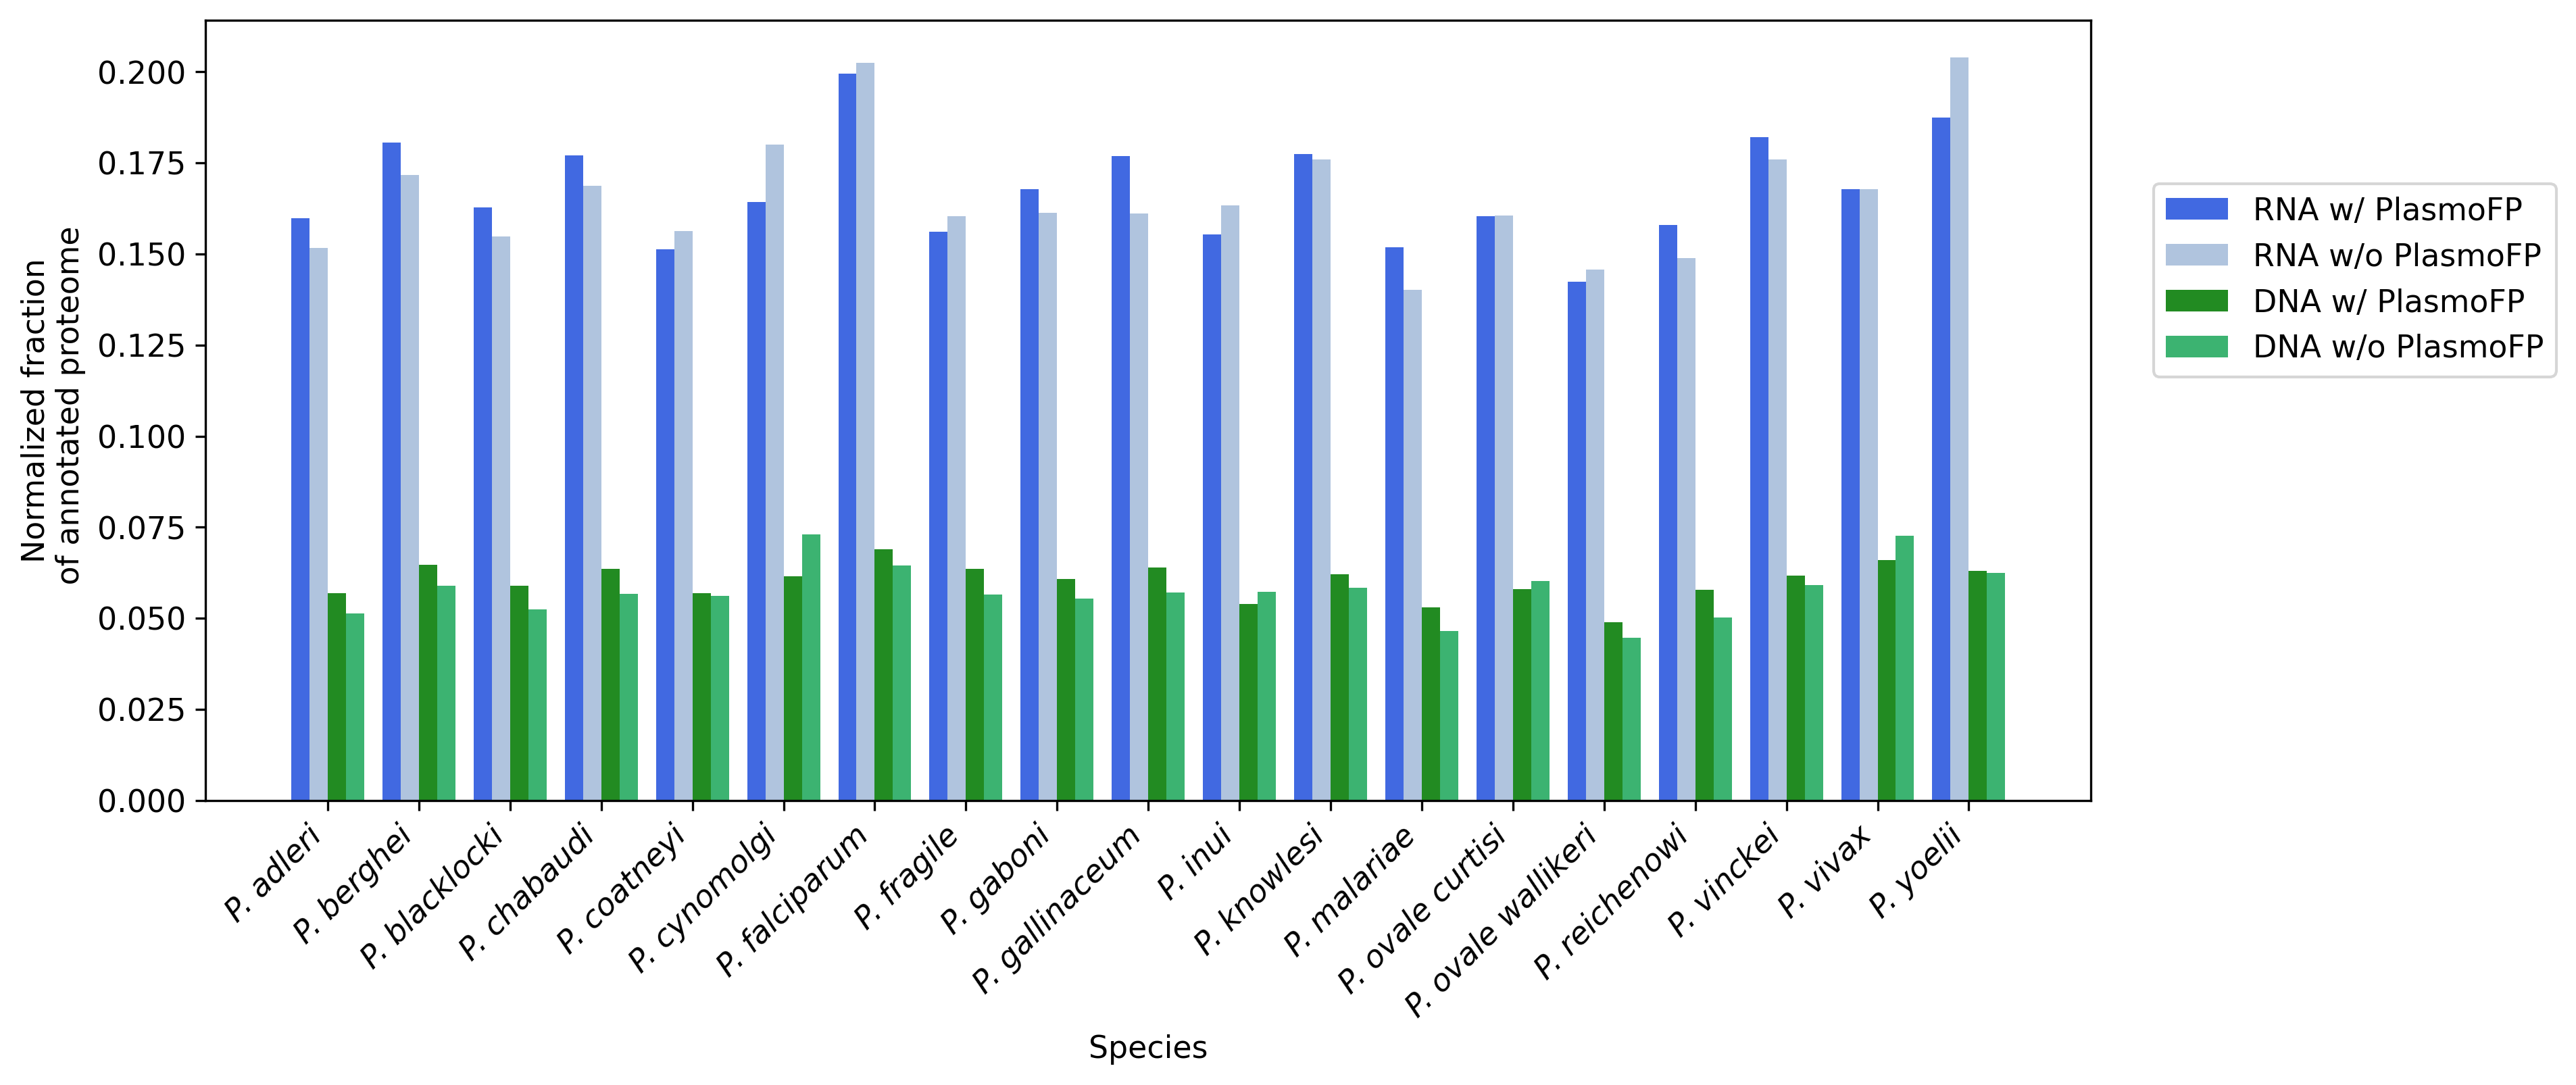

In [ ]:
plt.rcParams.update({'font.size': 11})

species = list(normalized_rna_presence_withPFP.keys())
labels  = [species_to_name.get(s, s) for s in species]

rna_with_norm    = [ normalized_rna_presence_withPFP[s]    for s in species ]
rna_without_norm = [ normalized_rna_presence_withoutPFP[s] for s in species ]
dna_with_norm    = [ normalized_dna_presence_withPFP[s]    for s in species ]
dna_without_norm = [ normalized_dna_presence_withoutPFP[s] for s in species ]

data = list(zip(species, labels,
                rna_with_norm, rna_without_norm,
                dna_with_norm, dna_without_norm))
data_sorted = sorted(data, key=lambda x: x[1])
_, labels_sorted, rna_with_norm, rna_without_norm, dna_with_norm, dna_without_norm = zip(*data_sorted)

rna_with_norm    = [count for label, count in zip(labels_sorted, rna_with_norm) if label != 'P. vivax P01']
rna_without_norm = [count for label, count in zip(labels_sorted, rna_without_norm) if label != 'P. vivax P01']
dna_with_norm    = [count for label, count in zip(labels_sorted, dna_with_norm) if label != 'P. vivax P01']
dna_without_norm = [count for label, count in zip(labels_sorted, dna_without_norm) if label != 'P. vivax P01']

N     = len(labels_sorted)
x     = np.arange(N)
width = 0.2

plt.figure(figsize=(12, 5), dpi=300)

plt.bar(x - 1.5*width, rna_with_norm,    width, label='RNA w/ PlasmoFP',    color='royalblue')
plt.bar(x - 0.5*width, rna_without_norm, width, label='RNA w/o PlasmoFP',  color='lightsteelblue')
plt.bar(x + 0.5*width, dna_with_norm,    width, label='DNA w/ PlasmoFP',    color='forestgreen')
plt.bar(x + 1.5*width, dna_without_norm, width, label='DNA w/o PlasmoFP',  color='mediumseagreen')

plt.xlabel('Species')
plt.ylabel('Normalized fraction\n of annotated proteome')
plt.xticks(x, labels_sorted, rotation=45, ha='right',fontstyle='italic')
plt.legend(loc='upper center', bbox_to_anchor=(1.14, 0.81), ncol=1)
plt.grid(False)
# plt.tight_layout()
plt.show()


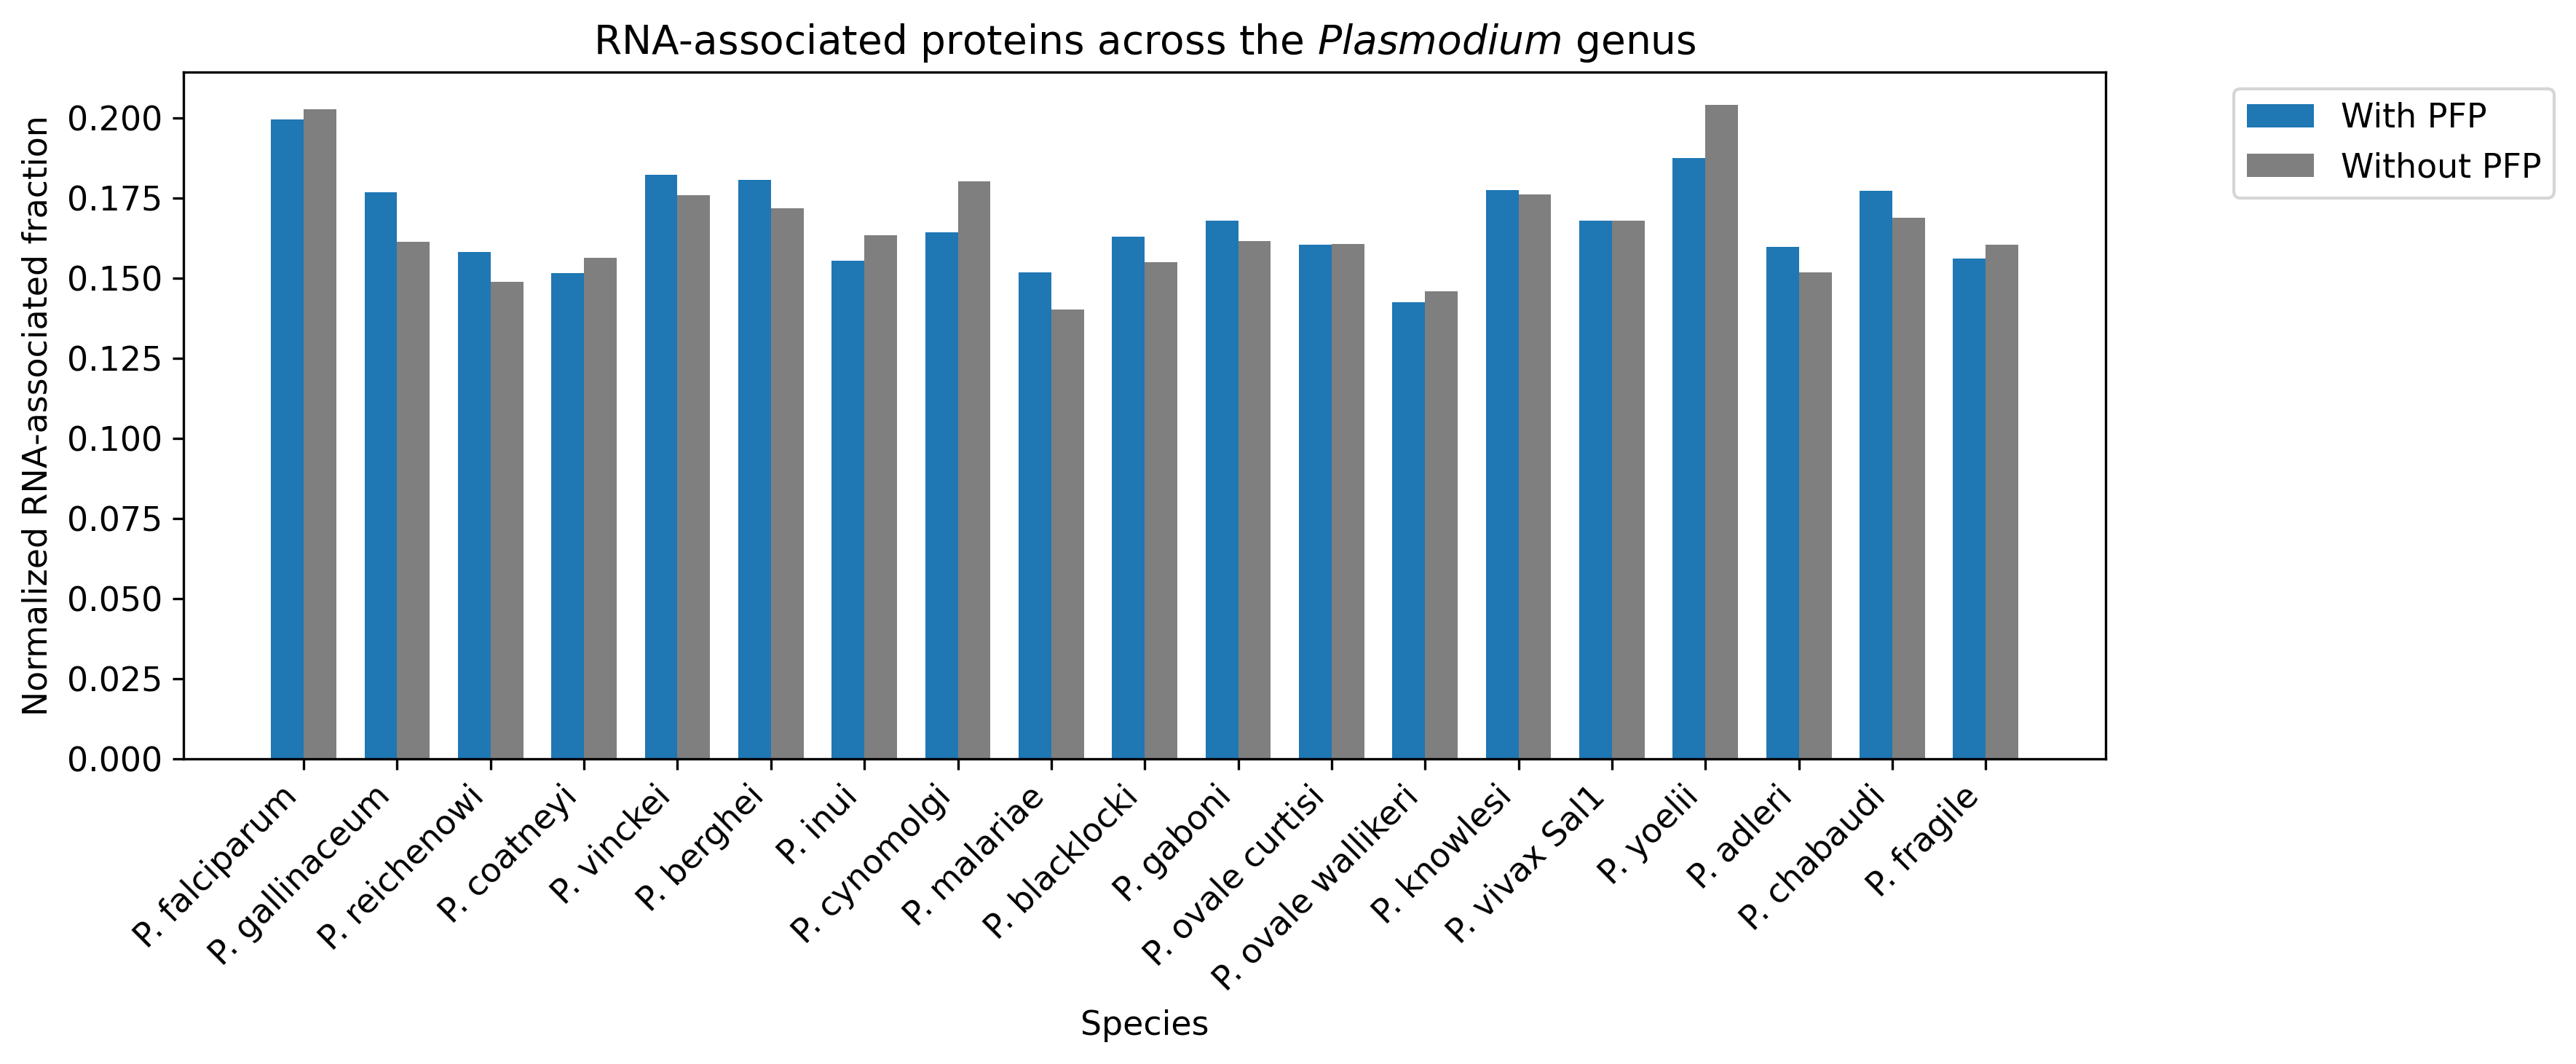

In [ ]:
with_pfp    = [normalized_rna_presence_withPFP[sp]             for sp in species]
without_pfp = [normalized_rna_presence_withoutPFP[sp] for sp in species]

x     = np.arange(len(species))
width = 0.35

plt.figure(figsize=(12, 5), dpi=300)
plt.bar(x - width/2, with_pfp,    width, label='With PFP',    color='tab:blue')
plt.bar(x + width/2, without_pfp, width, label='Without PFP', color='tab:grey')

plt.xlabel('Species')
plt.ylabel('Normalized RNA‐associated fraction')
plt.title(r"RNA‐associated proteins across the $\mathit{Plasmodium}$ genus")
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1), ncol=1)
plt.tight_layout()
plt.show()

In [ ]:
rows = []
for s in species:
    rows.append({
        "Species": s,
        "RNA_count_withPFP": RNA_associated_counts[s],
        "RNA_count_withoutPFP": RNA_associated_counts_withoutPFP[s],
        "RNA_count_new": RNA_associated_counts[s] - RNA_associated_counts_withoutPFP[s],
        "DNA_count_withPFP": DNA_associated_counts[s],
        "DNA_count_withoutPFP": DNA_associated_counts_withoutPFP[s],
        "DNA_count_new": DNA_associated_counts[s] - DNA_associated_counts_withoutPFP[s],
        "RNA_norm_withPFP": normalized_rna_presence_withPFP[s],
        "RNA_norm_withoutPFP": normalized_rna_presence_withoutPFP[s],
        "DNA_norm_withPFP": normalized_dna_presence_withPFP[s],
        "DNA_norm_withoutPFP": normalized_dna_presence_withoutPFP[s],
    })

df = pd.DataFrame(rows)

print(df)

df.to_csv('rna_associated_table.tsv', sep='\t')

                               Species  RNA_count_withPFP  \
0           PlasmoDB-68_Pfalciparum3D7               1041   
1           PlasmoDB-68_Pgallinaceum8A                869   
2           PlasmoDB-68_PreichenowiCDC                840   
3         PlasmoDB-68_PcoatneyiHackeri                785   
4   PlasmoDB-68_PvinckeibrucechwattiDA                865   
5             PlasmoDB-68_PbergheiANKA                851   
6         PlasmoDB-68_PinuiSanAntonio1                861   
7              PlasmoDB-68_PcynomolgiM                769   
8            PlasmoDB-68_PmalariaeUG01                853   
9           PlasmoDB-68_PblacklockiG01                785   
10              PlasmoDB-68_PgaboniG01                807   
11       PlasmoDB-68_PovalecurtisiGH01                809   
12  PlasmoDB-68_PovalewallikeriPowCR01                786   
13              PlasmoDB-68_PknowlesiH                856   
14              PlasmoDB-68_PvivaxSal1                852   
15  PlasmoDB-68_Pyoeliiy